In [13]:
pip install geopandas

In [14]:
!pip install psycopg2


In [15]:
pip install geopandas pandas matplotlib


In [16]:
pip install geodatasets


Note: you may need to restart the kernel to use updated packages.


In [17]:
# Import necessary libraries

import pandas as pd
import psycopg2 as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Define connection parameters
host = 'localhost'
port = '5433'
dbname = 'plastic_pollution'
user = 'postgres'
password = 'Addis@11'

In [37]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('plastic_pollution.db')

# Create a cursor object
cursor = conn.cursor()

In [38]:
# Fetch the results
records = cursor.fetchall()

In [39]:


# Define list of 10 top countries list
countries = ['China', 'United States', 'India', 'Japan', 'Germany', 'Brazil', 'Indonesia', 'Russia', 'United Kingdom', 'France']

# Create a DataFrame with the countries list
country_df = pd.DataFrame({
    'country': countries
})

# Display the DataFrame
print(country_df)

          country
0           China
1   United States
2           India
3           Japan
4         Germany
5          Brazil
6       Indonesia
7          Russia
8  United Kingdom
9          France


In [32]:
import pandas as pd

# Define the top 20 countries and their plastic waste quantities (in metric tons)

top_20_countries = df.sort_values(by='Plastic Waste (Metric Tons)', ascending=False).head(20)

# Create a DataFrame
plastic_waste_df = pd.DataFrame(data)

# Display the DataFrame
print(plastic_waste_df)

           Country  Plastic Waste (Metric Tons)
0            China                        59.08
1    United States                        42.02
2            India                        26.33
3            Japan                         7.99
4          Germany                         6.28
5           Brazil                         5.96
6        Indonesia                         5.85
7           Russia                         5.84
8   United Kingdom                         5.03
9           France                         4.98
10          Mexico                         4.43
11          Canada                         3.89
12           Italy                         3.83
13          Turkey                         3.21
14     South Korea                         2.91
15           Spain                         2.58
16         Vietnam                         2.54
17        Thailand                         2.41
18        Malaysia                         2.31
19          Poland                      

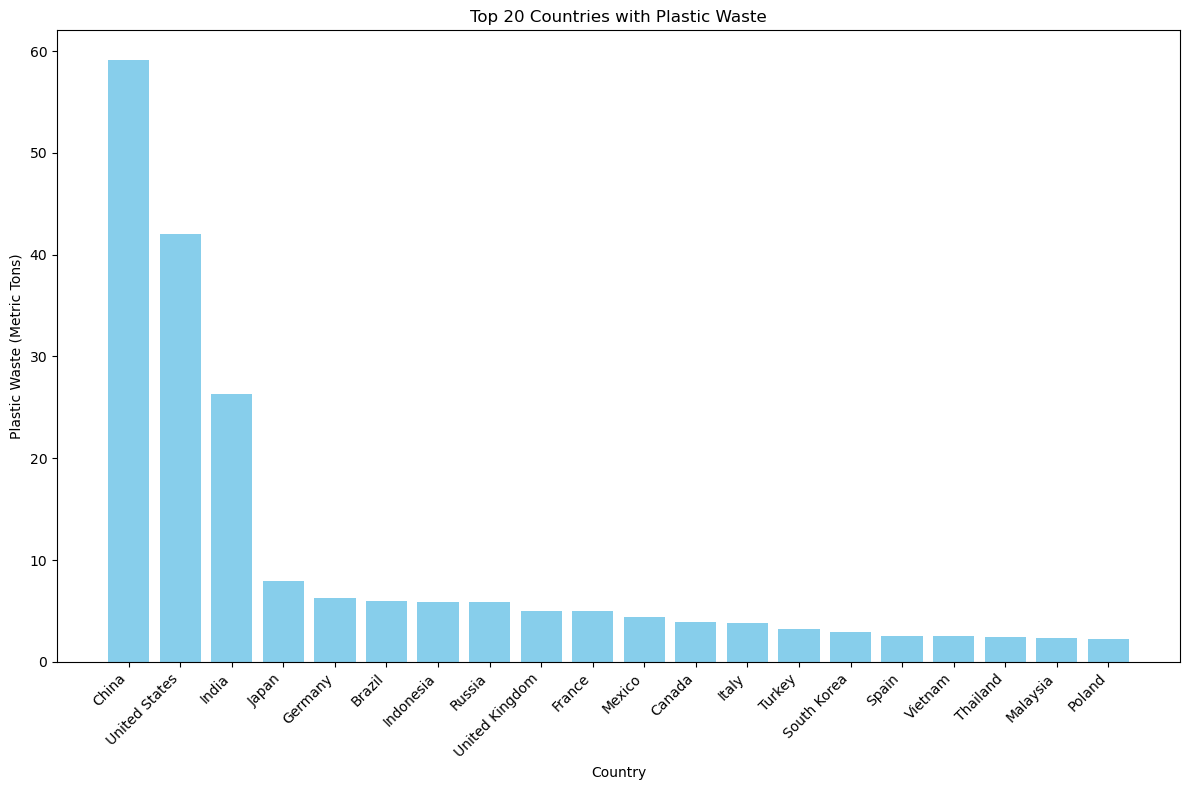

In [40]:


# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Sort the data by plastic waste in descending order and select the top 20 countries for the year 2023
top_20_countries = df.sort_values(by='Plastic Waste (Metric Tons)', ascending=False).head(20)

# Now you can create the bar chart as before
plt.figure(figsize=(12, 8))
plt.bar(top_20_countries['Country'], top_20_countries['Plastic Waste (Metric Tons)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Plastic Waste (Metric Tons)')
plt.title('Top 20 Countries with Plastic Waste')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the bar chart
plt.show()

In [41]:


# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Select the top 20 countries based on total plastic waste 
top_20_countries = df.nlargest(20, 'Recycling_rate')['Country']

# Filter the data for the top 10 countries
filtered_data = df[df['Country'].isin(top_20_countries)]

# Plot the plastic waste for each country
plt.figure(figsize=(12, 8))

for country in top_20_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Recycling_rate'], label=f'{country} - marker='D')

# Add labels and title
plt.xlabel('Recycling_rate')
plt.ylabel('Country')
plt.title('Plastic Waste versus recycling rate in 2023 for Top 20 Countries')

# Add a legend
plt.legend()

# Display the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 15) (1998786522.py, line 15)

In [33]:


# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Select the top 20 countries based on total plastic waste 
top_20_countries = df.nlargest(20, 'Plastic Waste (Metric Tons)')['Country']

# Filter the data for the top 10 countries
filtered_data = df[df['Country'].isin(top_20_countries)]

# Plot the plastic waste for each country
plt.figure(figsize=(12, 8))

for country in top_20_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Recycling_rate'], country_data['Plastic Waste (Metric Tons)'], label=f'{country} - Plastic Waste (tons)', marker='D')

# Add labels and title
plt.xlabel('Recycling_rate')
plt.ylabel('Plastic Waste (Metric Tons)')
plt.title('Plastic Waste versus recycling rate in 2023 for Top 20 Countries')

# Add a legend
plt.legend()

# Display the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Recycling_rate'

<Figure size 1200x800 with 0 Axes>

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the data dictionary with country names and plastic waste amounts
data = {
    'Country': ['China', 'United States', 'India', 'Japan', 'Germany', 'Brazil', 'Indonesia', 'Russia', 'United Kingdom', 'France', 'Mexico', 'Canada', 'Italy', 'Turkey', 'South Korea', 'Spain', 'Vietnam', 'Thailand', 'Malaysia', 'Poland'],
    'Plastic Waste (Metric Tons)': [59.08, 42.02, 26.33, 7.99, 6.28, 5.96, 5.85, 5.84, 5.03, 4.98, 4.43, 3.89, 3.83, 3.21, 2.91, 2.58, 2.54, 2.41, 2.31, 2.21]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Sort the data by plastic waste in descending order and select the top 20 countries
top_20_countries = df.sort_values(by='Plastic Waste (Metric Tons)', ascending=False).head(20)

# Load the world map from the extracted shapefile
world = gpd.read_file('C:/Users/stona/OneDrive/Desktop/PROJECT3/ne_110m_admin_0_countries.shp')

# Check the columns in the 'world' GeoDataFrame to find the correct column name for country names
print(world.columns)

# Merge the top 20 countries data with the world map using the correct column for country names
world_top_20 = world.merge(top_20_countries, how='right', left_on='Plastic Waste (Metric Tons', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plot the top 20 countries
world_top_20.plot(column='Plastic Waste (Metric Tons)', ax=ax, legend=True,
                  legend_kwds={'label': "Plastic Waste (tons)", 'orientation': "horizontal"},
                  cmap='OrRd', edgecolor='black')

plt.title('Top 20 Plastic Waste Creating Countries')
plt.show()

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


KeyError: 'Plastic Waste (Metric Tons'

In [34]:


# Define the data dictionary with country names and plastic waste amounts
data = {
    'Country': ['China', 'United States', 'India', 'Japan', 'Germany', 'Brazil', 'Indonesia', 'Russia', 'United Kingdom', 'France', 'Mexico', 'Canada', 'Italy', 'Turkey', 'South Korea', 'Spain', 'Vietnam', 'Thailand', 'Malaysia', 'Poland'],
    'Plastic Waste (Metric Tons)': [59.08, 42.02, 26.33, 7.99, 6.28, 5.96, 5.85, 5.84, 5.03, 4.98, 4.43, 3.89, 3.83, 3.21, 2.91, 2.58, 2.54, 2.41, 2.31, 2.21]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Sort the data by plastic waste in descending order and select the top 20 countries
top_20_countries = df.sort_values(by='Plastic Waste (Metric Tons)', ascending=False).head(20)

# Load the world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the top 20 countries data with the world map
world_top_20 = world.merge(top_20_countries, how='right', left_on='name', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plot the top 20 countries
world_top_20.plot(column='Plastic Waste (Metric Tons)', ax=ax, legend=True,
                  legend_kwds={'label': "Plastic Waste (tons)", 'orientation': "horizontal"},
                  cmap='OrRd', edgecolor='black')

plt.title('Top 20 Plastic Waste Creating Countries')
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [5]:
# Close the cursor and connection
cursor.close()
conn.close()

NameError: name 'cursor' is not defined